### Exercise 5: Correlation Matrix & Heatmap

In [1]:
# 5.1
!pip install scikit-learn pandas matplotlib seaborn --quiet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# 5.3 Compute correlation matrix
corr = X.corr()

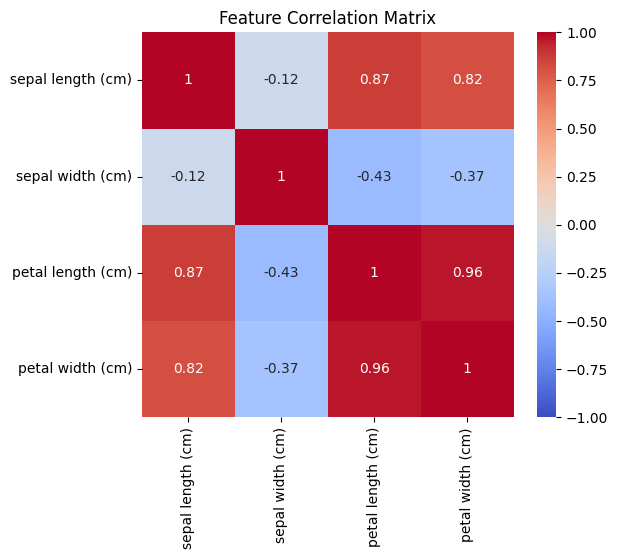

In [4]:

# 5.4 Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
# 5.6 Identify high-correlation pairs
high_corr = [(i, j, corr.loc[i,j])
for i in corr.columns for j in corr.columns
if i != j and abs(corr.loc[i,j]) > 0.7 and i < j]
print("Highly correlated pairs (|r|>0.7):", high_corr)

Highly correlated pairs (|r|>0.7): [('petal length (cm)', 'sepal length (cm)', np.float64(0.8717537758865838)), ('petal length (cm)', 'petal width (cm)', np.float64(0.962865431402796)), ('petal width (cm)', 'sepal length (cm)', np.float64(0.8179411262715758))]


In [6]:
#  Analysis 1: List high-correlation feature pairs
high_corr = []
threshold = 0.7
for i in corr.columns:
    for j in corr.columns:
        if i < j and abs(corr.loc[i, j]) > threshold:
            high_corr.append((i, j, corr.loc[i, j]))
print("Highly correlated pairs (|r| > 0.7):")
for i, j, r in high_corr:
    print(f"  {i} ↔ {j}: r = {r:.2f}")

Highly correlated pairs (|r| > 0.7):
  petal length (cm) ↔ sepal length (cm): r = 0.87
  petal length (cm) ↔ petal width (cm): r = 0.96
  petal width (cm) ↔ sepal length (cm): r = 0.82


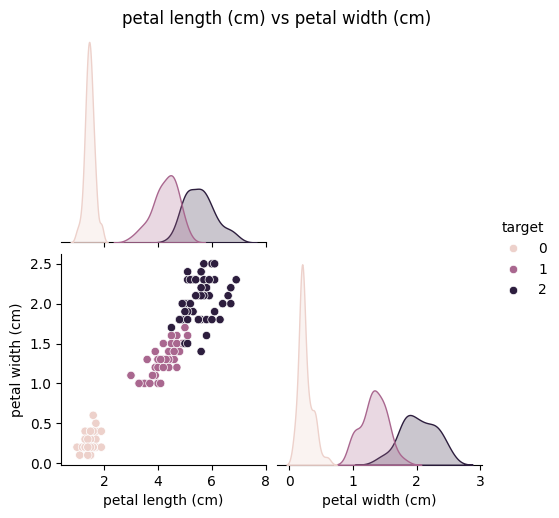

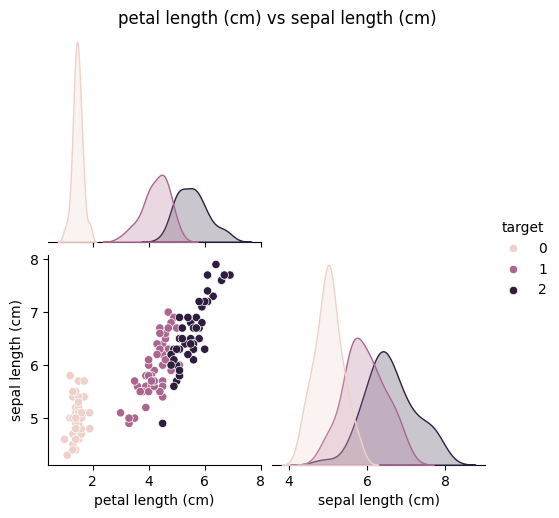

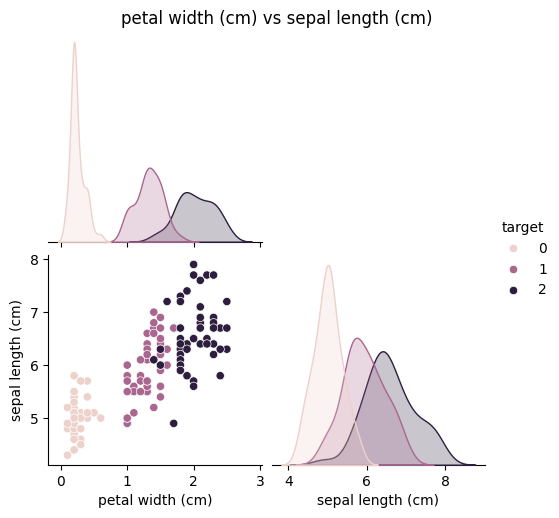

In [7]:
# Analysis 2: Visualize redundancy impact via pairplots
import itertools
top_pairs = [pair[:2] for pair in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True)]
for feat1, feat2 in top_pairs:
    sns.pairplot(pd.concat([X[[feat1, feat2]], y.rename('target')], axis=1),
                 hue='target', corner=True)
    plt.suptitle(f"{feat1} vs {feat2}", y=1.02)
    plt.show()

In [8]:
# 5.7 Analysis 3: Drop one feature from each highly correlated pair and evaluate model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# For each pair, drop the second feature and measure accuracy
results = {}
for feat1, feat2, _ in high_corr:
    X_drop = X_train.drop(columns=[feat2])
    model = LogisticRegression(max_iter=200).fit(X_drop, y_train)
    acc = accuracy_score(y_test, model.predict(X_test.drop(columns=[feat2])))
    results[f"drop {feat2}"] = acc

# Baseline with all features
base = LogisticRegression(max_iter=200).fit(X_train, y_train)
results["all features"] = accuracy_score(y_test, base.predict(X_test))

pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
drop sepal length (cm),1.000000
drop petal width (cm),0.966667
all features,1.000000
